In [1]:
import pandas as pd
import numpy as np
import scipy.stats
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import re
import seaborn as sns
import statsmodels.stats.multitest
#import altair as alt
#alt.renderers.enable('notebook') #Necessary for Altair to work

In [2]:
import CPTAC

Loading CPTAC data:
Loading Dictionary...
Loading Clinical Data...
Loading Proteomics Data...
Loading Transcriptomics Data...
Loading CNA Data...
Loading Phosphoproteomics Data...
Loading Somatic Mutation Data...

 ******PLEASE READ******
CPTAC is a community resource project and data are made available
rapidly after generation for community research use. The embargo
allows exploring and utilizing the data, but the data may not be in a
publication until July 1, 2019. Please see
https://proteomics.cancer.gov/data-portal/about/data-use-agreement or
enter CPTAC.embargo() to open the webpage for more details.


In [6]:
somatic_mutations = CPTAC.get_somatic()
proteomics = CPTAC.get_proteomics()
phos = CPTAC.get_phosphoproteomics()
transcriptomics = CPTAC.get_transcriptomics()
transcriptomics_columns = CPTAC.get_transcriptomics_cols()

#print(transcriptomics_columns)
#print(transcriptomics)

28057


In [4]:
siteList = ['A1BG','SMARCB1]

### Look through our list of sites, test for difference in transcriptomics levels when ARID1A is mutated

In [14]:
p_values = []
site_names = []
gene = 'ARID1A'

'''Perform a T-Test comparing transcriptomics levels when ARID1A is mutated vs wildtype, in tumor patients only'''
for site in siteList:
    transdf = CPTAC.compare_mutations(transcriptomics, site, gene)
    transdf = transdf.loc[transdf["Patient_Type"] == "Tumor"]
    #print(transdf)
    wtdf = transdf.loc[transdf["Mutation"] == "Wildtype"]
    mutateddf = transdf.loc[transdf["Mutation"] != "Wildtype"]
    ttest = scipy.stats.ttest_ind(wtdf[site], mutateddf[site])
    p_values.append(ttest[1])
    site_names.append(site)


In [15]:
print(p_values)
print(site_names)

[0.029689655232897332, 0.6504035055211781, 0.07358177108827957]
['A1BG', 'ZXDB', 'ZYX']


### Adjust for multiple testing using Bonferroni correction

In [18]:
bonferroniCutoff = .05/ len(siteList)
print(bonferroniCutoff)

significantSites = []
significantPvals = []

for i in range(0, len(p_values)):
    if p_values[i] <= bonferroniCutoff:
        significantPvals.append(p_values[i])
        significantSites.append(site_names[i])


0.03333333333333333
{'A1BG': 0.029689655232897332}


In [19]:
#Print off significant sites
print(significantSites)

['A1BG']


In [20]:
#Print off significant p_values
print(significantPvals)

[0.029689655232897332]


In [21]:
#Make a dict of sites-p-values

bfSignificantVals = dict(zip(significantSites, significantPvals))
print(bfSignificantVals)

{'A1BG': 0.029689655232897332}


### Plot the significant sites, Mutated vs Wildtype

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':


[Text(0, 0.5, 'Transcriptomics'), Text(0.5, 0, 'Mutation Type')]

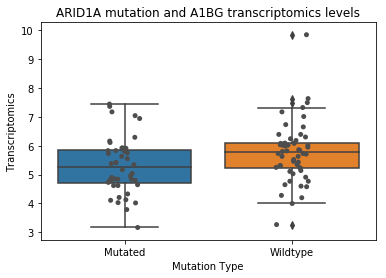

In [45]:
gene = "ARID1A"
site = "A1BG"

genedf = CPTAC.compare_mutations(transcriptomics, site, gene)
genedf = genedf.loc[genedf["Patient_Type"] == "Tumor"].drop("Patient_Type", axis = 1)
#print(genedf)


for i, row in genedf.iterrows():
    id = i
    if row['Mutation'] != 'Wildtype':
        genedf.set_value(id,'Mutation','Mutated')

phos_boxplot = sns.boxplot(data=genedf, x="Mutation",y=site)
phos_boxplot.set_title(gene + " mutation and " + site + " transcriptomics levels")
phos_boxplot = sns.stripplot(data=genedf, x="Mutation", y=site,jitter=True, color=".3")
phos_boxplot.set(xlabel="Mutation Type",ylabel="Transcriptomics")

### Plot significant sites, look at all mutations

[Text(0, 0.5, 'Transcriptomics'), Text(0.5, 0, 'Mutation Type')]

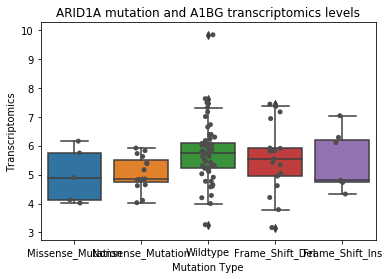

In [46]:
gene = "ARID1A"
site = "A1BG"

genedf = CPTAC.compare_mutations(transcriptomics, site, gene)
genedf = genedf.loc[genedf["Patient_Type"] == "Tumor"].drop("Patient_Type", axis = 1)
#print(genedf)

phos_boxplot = sns.boxplot(data=genedf, x="Mutation",y=site)
phos_boxplot.set_title(gene + " mutation and " + site + " transcriptomics levels")
phos_boxplot = sns.stripplot(data=genedf, x="Mutation", y=site,jitter=True, color=".3")
phos_boxplot.set(xlabel="Mutation Type",ylabel="Transcriptomics")